# **DM Lab 4 Task**
## **Muhammad** **Adeel** - **2022331**

# **Task 1 – Experiment With Different Threshold Values**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules #for association rule

In [ ]:
# transaction dataset
transactions = [
    ['coke', 'cheese', 'pizza'],
    ['coke', 'cheese'],
    ['coke', 'pizza'],
    ['cheese', 'pizza'],
    ['coke', 'cheese', 'pizza', 'ketchup'],
    ['coke', 'ketchup'],
    ['cheese', 'ketchup'],
    ['coke', 'cheese', 'ketchup']]

In [ ]:
#converting dataset into a DataFrame
items = sorted(set(item for transaction in transactions for item in transaction))
df = pd.DataFrame([{item: (item in transaction) for item in items} for transaction in transactions])

In [ ]:
df

,cheese,coke,ketchup,pizza
0,True,True,False,True
1,True,True,False,False
2,False,True,False,True
3,True,False,False,True
4,True,True,True,True
5,False,True,True,False
6,True,False,True,False
7,True,True,True,False


In [ ]:
#function to run Apriori with different thresholds
def experiment_with_thresholds(support_values):
    results = {}

    for min_support in support_values:
        # Generate frequent itemsets
        frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

        # Generate association rules
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

        # Store results
        results[min_support] = rules

    return results

In [ ]:
support_values = [0.2,0.3,0.5]

In [ ]:
#Run the experiment
rules_results = experiment_with_thresholds(support_values)


In [ ]:
#Display results
for support, rules in rules_results.items():
    print(f"\n--- Association Rules for Support = {support} ---\n")
    display(rules)



--- Association Rules for Support = 0.2 ---



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(coke),(cheese),0.750,0.75,0.500,0.666667,0.888889,1.0,-0.06250,0.75,-0.333333,0.500000,-0.333333,0.666667
1,(cheese),(coke),0.750,0.75,0.500,0.666667,0.888889,1.0,-0.06250,0.75,-0.333333,0.500000,-0.333333,0.666667
2,(ketchup),(cheese),0.500,0.75,0.375,0.750000,1.000000,1.0,0.00000,1.00,0.000000,0.428571,0.000000,0.625000
3,(cheese),(ketchup),0.750,0.50,0.375,0.500000,1.000000,1.0,0.00000,1.00,0.000000,0.428571,0.000000,0.625000
4,(pizza),(cheese),0.500,0.75,0.375,0.750000,1.000000,1.0,0.00000,1.00,0.000000,0.428571,0.000000,0.625000
5,(cheese),(pizza),0.750,0.50,0.375,0.500000,1.000000,1.0,0.00000,1.00,0.000000,0.428571,0.000000,0.625000
6,(ketchup),(coke),0.500,0.75,0.375,0.750000,1.000000,1.0,0.00000,1.00,0.000000,0.428571,0.000000,0.625000
7,(coke),(ketchup),0.750,0.50,0.375,0.500000,1.000000,1.0,0.00000,1.00,0.000000,0.428571,0.000000,0.625000
8,(pizza),(coke),0.500,0.75,0.375,0.750000,1.000000,1.0,0.00000,1.00,0.000000,0.428571,0.000000,0.625000
9,(coke),(pizza),0.750,0.50,0.375,0.500000,1.000000,1.0,0.00000,1.00,0.000000,0.428571,0.000000,0.625000



--- Association Rules for Support = 0.3 ---



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(coke),(cheese),0.75,0.75,0.500,0.666667,0.888889,1.0,-0.0625,0.75,-0.333333,0.500000,-0.333333,0.666667
1,(cheese),(coke),0.75,0.75,0.500,0.666667,0.888889,1.0,-0.0625,0.75,-0.333333,0.500000,-0.333333,0.666667
2,(ketchup),(cheese),0.50,0.75,0.375,0.750000,1.000000,1.0,0.0000,1.00,0.000000,0.428571,0.000000,0.625000
3,(cheese),(ketchup),0.75,0.50,0.375,0.500000,1.000000,1.0,0.0000,1.00,0.000000,0.428571,0.000000,0.625000
4,(pizza),(cheese),0.50,0.75,0.375,0.750000,1.000000,1.0,0.0000,1.00,0.000000,0.428571,0.000000,0.625000
5,(cheese),(pizza),0.75,0.50,0.375,0.500000,1.000000,1.0,0.0000,1.00,0.000000,0.428571,0.000000,0.625000
6,(ketchup),(coke),0.50,0.75,0.375,0.750000,1.000000,1.0,0.0000,1.00,0.000000,0.428571,0.000000,0.625000
7,(coke),(ketchup),0.75,0.50,0.375,0.500000,1.000000,1.0,0.0000,1.00,0.000000,0.428571,0.000000,0.625000
8,(pizza),(coke),0.50,0.75,0.375,0.750000,1.000000,1.0,0.0000,1.00,0.000000,0.428571,0.000000,0.625000
9,(coke),(pizza),0.75,0.50,0.375,0.500000,1.000000,1.0,0.0000,1.00,0.000000,0.428571,0.000000,0.625000



--- Association Rules for Support = 0.5 ---



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(coke),(cheese),0.75,0.75,0.5,0.666667,0.888889,1.0,-0.0625,0.75,-0.333333,0.5,-0.333333,0.666667
1,(cheese),(coke),0.75,0.75,0.5,0.666667,0.888889,1.0,-0.0625,0.75,-0.333333,0.5,-0.333333,0.666667


<ipython-input-9-a06f68b925ab>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=support_values, y=num_rules, palette="Blues_d")


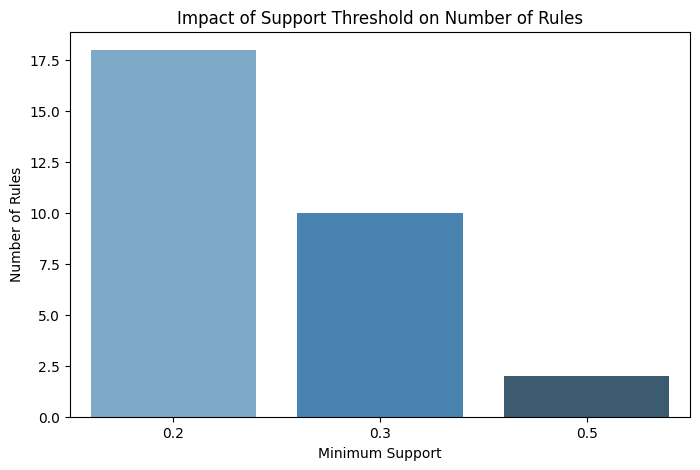

In [ ]:
#visualizing the number of rules generated at different thresholds
num_rules = [len(rules) for rules in rules_results.values()]

plt.figure(figsize=(8, 5))
sns.barplot(x=support_values, y=num_rules, palette="Blues_d")
plt.xlabel("Minimum Support")
plt.ylabel("Number of Rules")
plt.title("Impact of Support Threshold on Number of Rules")
plt.show()

#**Task 2 – Analyzing Fast Food Orders for Meal Combinations**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules


In [ ]:
import pandas as pd
import random

# Define a list of possible food items
food_items = [
    "Burger", "Fries", "Coke", "Pizza", "Pasta", "Salad", "Nuggets",
    "Ice Cream", "Coffee", "Tea", "Hot Dog", "Sandwich", "Smoothie",
    "Taco", "Sushi", "Donut", "Milkshake", "Wrap", "Fried Chicken", "Muffin"
]

# Generate 500 transactions with random food item combinations
transactions = []
for _ in range(500):
    num_items = random.randint(2, 6)  # Each transaction has 2 to 6 items
    transaction = random.sample(food_items, num_items)
    transactions.append(transaction)

# Convert list of transactions into a DataFrame where each row is a transaction
df_transactions = pd.DataFrame(transactions)

# Save dataset as CSV file
file_path = "/content/sample_dataFastFood_Orders.csv"
df_transactions.to_csv(file_path, index=False, header=False)

print("Downloaded at: ",file_path)

Downloaded at:  /content/sample_dataFastFood_Orders.csv


In [ ]:
df = pd.read_csv("/content/sample_dataFastFood_Orders.csv", header=None)

In [ ]:
df.head(10)

,0,1,2,3,4,5
0,Fried Chicken,Milkshake,Nuggets,Smoothie,Salad,NaN
1,Wrap,Fried Chicken,Muffin,Pasta,Sandwich,Smoothie
2,Burger,Tea,Coke,NaN,NaN,NaN
3,Wrap,Smoothie,NaN,NaN,NaN,NaN
4,Donut,Muffin,Coke,Fries,NaN,NaN
5,Fried Chicken,Coke,Sandwich,Salad,Pizza,NaN
6,Smoothie,Burger,NaN,NaN,NaN,NaN
7,Coffee,Donut,Sandwich,Milkshake,NaN,NaN
8,Hot Dog,Muffin,Tea,Fries,NaN,NaN
9,Coffee,Nuggets,Hot Dog,Wrap,Pasta,Fries


In [ ]:
transactions = []
for i in range(df.shape[0]):
    transactions.append([str(df.values[i, j]) for j in range(df.shape[1]) if str(df.values[i, j]) != 'nan'])

# Print first 5 transactions
print(transactions[:10])

[['Fried Chicken', 'Milkshake', 'Nuggets', 'Smoothie', 'Salad'], ['Wrap', 'Fried Chicken', 'Muffin', 'Pasta', 'Sandwich', 'Smoothie'], ['Burger', 'Tea', 'Coke'], ['Wrap', 'Smoothie'], ['Donut', 'Muffin', 'Coke', 'Fries'], ['Fried Chicken', 'Coke', 'Sandwich', 'Salad', 'Pizza'], ['Smoothie', 'Burger'], ['Coffee', 'Donut', 'Sandwich', 'Milkshake'], ['Hot Dog', 'Muffin', 'Tea', 'Fries'], ['Coffee', 'Nuggets', 'Hot Dog', 'Wrap', 'Pasta', 'Fries']]


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# Transform transactions to one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
# Display first few rows
df_encoded

,Burger,Coffee,Coke,Donut,Fried Chicken,Fries,Hot Dog,Ice Cream,Milkshake,Muffin,Nuggets,Pasta,Pizza,Salad,Sandwich,Smoothie,Sushi,Taco,Tea,Wrap
0,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,True,False,False,False,True
2,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
4,False,False,True,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,True,True,False,True,False,True,False,False,False,False,True,False,False,False,True,False
496,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False
497,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
498,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print("\nFrequent Itemsets:\n")
frequent_itemsets.head(10)


Frequent Itemsets:



,support,itemsets
0,0.216,(Burger)
1,0.226,(Coffee)
2,0.228,(Coke)
3,0.214,(Donut)
4,0.200,(Fried Chicken)
5,0.204,(Fries)
6,0.194,(Hot Dog)
7,0.200,(Ice Cream)
8,0.194,(Milkshake)
9,0.224,(Muffin)


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
#print("\nAssociation Rules:\n")
#rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
print("\nAssociation Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Association Rules:
               antecedents  consequents  support  confidence      lift
0          (Burger, Coke)     (Coffee)    0.012    0.315789  1.397299
1     (Burger, Ice Cream)     (Coffee)    0.014    0.368421  1.630182
2        (Burger, Coffee)  (Ice Cream)    0.014    0.318182  1.590909
3        (Burger, Coffee)   (Smoothie)    0.014    0.318182  1.371473
4        (Burger, Coffee)        (Tea)    0.014    0.318182  1.500858
..                    ...          ...      ...         ...       ...
210  (Sandwich, Smoothie)       (Taco)    0.014    0.333333  1.718213
211      (Sandwich, Taco)   (Smoothie)    0.014    0.333333  1.436782
212          (Sushi, Tea)   (Sandwich)    0.012    0.315789  1.547988
213     (Sushi, Sandwich)        (Tea)    0.012    0.352941  1.664817
214      (Sandwich, Wrap)        (Tea)    0.010    0.357143  1.684636

[215 rows x 5 columns]


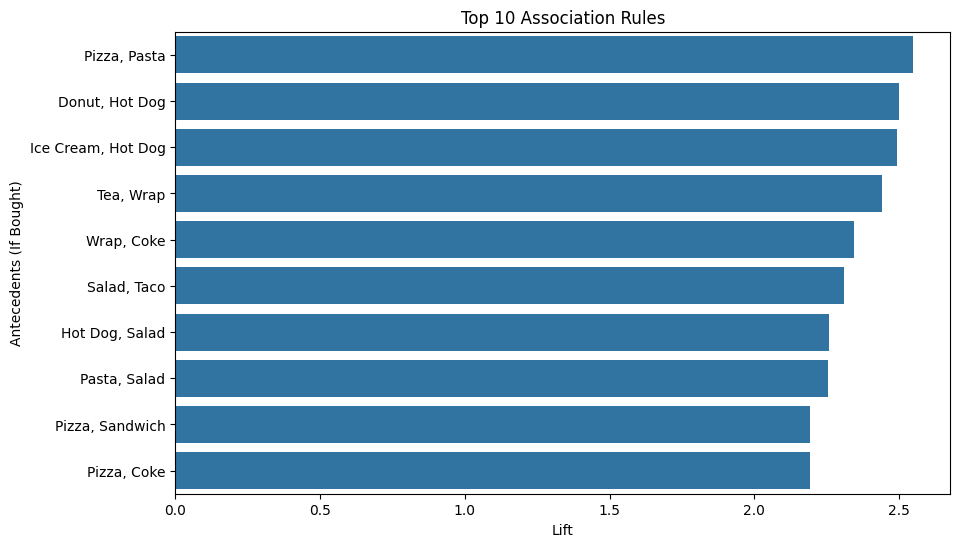

In [ ]:
# Sort rules by lift
rules = rules.sort_values(by="lift", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=rules['lift'], y=rules['antecedents'].apply(lambda x: ', '.join(list(x))), errorbar=None)
plt.xlabel("Lift")
plt.ylabel("Antecedents (If Bought)")
plt.title("Top 10 Association Rules")
plt.show()

# Task 3 –  Identifying Online Shopping Trends for a Clothing


In [ ]:
import pandas as pd
import random

# Define a list of possible food items
food_items = [
    "t-shirt", "jeans", "sneakers", "dress", "handbag", "sandals", "hoodie",
    "jogers", "flip-flops", "boots", "scarf", "cap", "blazer",
    "cap", "belt", "cargo pants", "heels", "tie", "sweatpants", "clutch"
]

# Generate 500 transactions with random food item combinations
transactions = []
for _ in range(500):
    num_items = random.randint(2, 7)  # Each transaction has 2 to 6 items
    transaction = random.sample(food_items, num_items)
    transactions.append(transaction)

# Convert list of transactions into a DataFrame where each row is a transaction
df_transactions = pd.DataFrame(transactions)

# Save dataset as CSV file
file_path = "/content/sample_data/Clothing_Orders.csv"
df_transactions.to_csv(file_path, index=False, header=False)

print("Downloaded at: ",file_path)

Downloaded at:  /content/sample_data/Clothing_Orders.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
df = pd.read_csv("/content/sample_data/Clothing_Orders.csv", header=None)

In [ ]:
df.head(10)

,0,1,2,3,4,5,6
0,flip-flops,sandals,belt,hoodie,NaN,NaN,NaN
1,blazer,dress,NaN,NaN,NaN,NaN,NaN
2,boots,t-shirt,sweatpants,jogers,jeans,NaN,NaN
3,heels,cap,sandals,jogers,NaN,NaN,NaN
4,jogers,sandals,hoodie,NaN,NaN,NaN,NaN
5,heels,belt,sandals,NaN,NaN,NaN,NaN
6,scarf,dress,sneakers,sweatpants,boots,heels,jogers
7,flip-flops,tie,sweatpants,NaN,NaN,NaN,NaN
8,sandals,dress,clutch,handbag,tie,NaN,NaN
9,heels,blazer,NaN,NaN,NaN,NaN,NaN


In [ ]:
transactions = []
for i in range(df.shape[0]):
    transactions.append([str(df.values[i, j]) for j in range(df.shape[1]) if str(df.values[i, j]) != 'nan'])

# Print first 5 transactions
print(transactions[:10])

[['flip-flops', 'sandals', 'belt', 'hoodie'], ['blazer', 'dress'], ['boots', 't-shirt', 'sweatpants', 'jogers', 'jeans'], ['heels', 'cap', 'sandals', 'jogers'], ['jogers', 'sandals', 'hoodie'], ['heels', 'belt', 'sandals'], ['scarf', 'dress', 'sneakers', 'sweatpants', 'boots', 'heels', 'jogers'], ['flip-flops', 'tie', 'sweatpants'], ['sandals', 'dress', 'clutch', 'handbag', 'tie'], ['heels', 'blazer']]


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# Transform transactions to one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Display first few rows
df_encoded.head()

,belt,blazer,boots,cap,cargo pants,clutch,dress,flip-flops,handbag,heels,hoodie,jeans,jogers,sandals,scarf,sneakers,sweatpants,t-shirt,tie
0,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False
1,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False
3,False,False,False,True,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
print("\nFrequent Itemsets:\n")
frequent_itemsets


Frequent Itemsets:



,support,itemsets
0,0.256,(belt)
1,0.222,(blazer)
2,0.226,(boots)
3,0.336,(cap)
4,0.242,(cargo pants)
...,...,...
284,0.020,"(t-shirt, jeans, heels)"
285,0.020,"(sandals, jogers, jeans)"
286,0.020,"(jogers, sweatpants, jeans)"
287,0.026,"(sandals, jeans, scarf)"


In [ ]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
print("\nAssociation Rules:\n")
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


Association Rules:



,antecedents,consequents,support,confidence,lift
0,(blazer),(belt),0.048,0.216216,0.844595
1,(boots),(belt),0.066,0.292035,1.140763
2,(belt),(boots),0.066,0.257812,1.140763
3,(cap),(belt),0.082,0.244048,0.953311
4,(belt),(cap),0.082,0.320312,0.953311
...,...,...,...,...,...
557,"(sandals, scarf)",(jeans),0.026,0.393939,1.515152
558,"(jeans, scarf)",(sandals),0.026,0.406250,1.515858
559,"(t-shirt, jeans)",(scarf),0.020,0.322581,1.427348
560,"(t-shirt, scarf)",(jeans),0.020,0.344828,1.326260


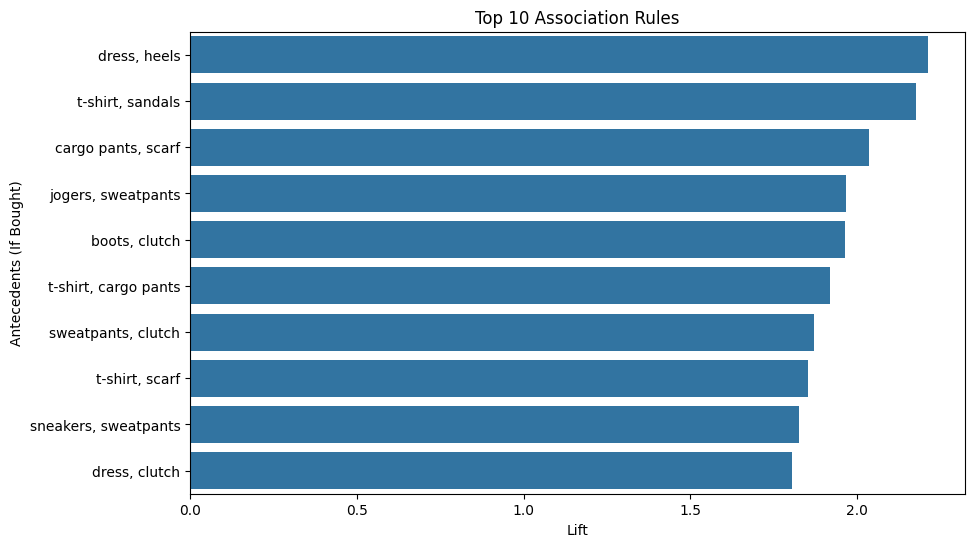

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort rules by lift
rules = rules.sort_values(by="lift", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=rules['lift'], y=rules['antecedents'].apply(lambda x: ', '.join(list(x))), errorbar=None)
plt.xlabel("Lift")
plt.ylabel("Antecedents (If Bought)")
plt.title("Top 10 Association Rules")
plt.show()

In [ ]:
# Check if rules exist
if not rules.empty:
    # Sort and display top rules
    rules_sorted = rules.sort_values(by="confidence", ascending=False)
    print("\nTop Association Rules:")
    print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(20))




Top Association Rules:
                antecedents    consequents  support  confidence      lift
506      (t-shirt, sandals)  (cargo pants)    0.020    0.526316  2.174859
347         (boots, clutch)      (sandals)    0.020    0.526316  1.963865
351          (dress, heels)        (boots)    0.020    0.500000  2.212389
512         (dress, clutch)   (sweatpants)    0.022    0.458333  1.804462
509        (t-shirt, scarf)  (cargo pants)    0.026    0.448276  1.852380
360    (jogers, sweatpants)        (boots)    0.024    0.444444  1.966568
508  (t-shirt, cargo pants)        (scarf)    0.026    0.433333  1.917404
510    (cargo pants, scarf)      (t-shirt)    0.026    0.419355  2.035703
519    (sweatpants, clutch)     (sneakers)    0.024    0.400000  1.869159
517  (sneakers, sweatpants)       (clutch)    0.024    0.387097  1.825928


In [ ]:
#Product Recommendation Insights:
print("\n Website Product Recommendations Based on Analysis:")
top_pairs = rules_sorted[['antecedents', 'consequents']].head(5)
for index, row in top_pairs.iterrows():
    print(f"Customers who buy {', '.join(row['antecedents'])} often buy {', '.join(row['consequents'])}. Recommend pairing these items!")



 Website Product Recommendations Based on Analysis:
Customers who buy t-shirt, sandals often buy cargo pants. Recommend pairing these items!
Customers who buy boots, clutch often buy sandals. Recommend pairing these items!
Customers who buy dress, heels often buy boots. Recommend pairing these items!
Customers who buy dress, clutch often buy sweatpants. Recommend pairing these items!
Customers who buy t-shirt, scarf often buy cargo pants. Recommend pairing these items!
